# CMIP6 Emulation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from esem import gp_model
from esem.utils import validation_plot
%matplotlib inline

In [2]:
df = pd.read_csv('CMIP6_scenarios.csv', index_col=0).dropna()

In [3]:
# These are the models included
df.model.unique()

array(['CanESM5', 'ACCESS-ESM1-5', 'ACCESS-CM2', 'MPI-ESM1-2-HR',
       'MIROC-ES2L', 'HadGEM3-GC31-LL', 'UKESM1-0-LL', 'MPI-ESM1-2-LR',
       'CESM2', 'CESM2-WACCM', 'NorESM2-LM'], dtype=object)

In [4]:
# And these scenarios
df.scenario.unique()

array(['ssp126', 'ssp119', 'ssp245', 'ssp370', 'ssp585', 'ssp434'],
      dtype=object)

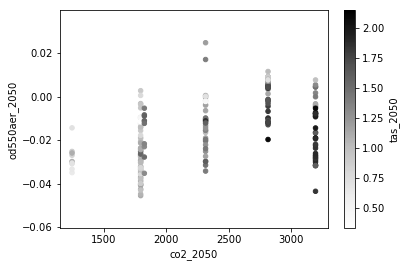

In [5]:
ax = df.plot.scatter(x='co2_2050', y='od550aer_2050', c='tas_2050')

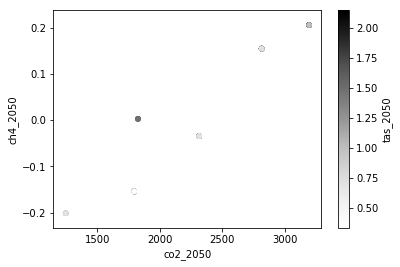

In [6]:
ax = df.plot.scatter(x='co2_2050', y='ch4_2050', c='tas_2050')

In [7]:
# Collapse ensemble members
df = df.groupby(['model', 'scenario']).mean()
df

tas_2050  od550aer_2050  tas_2100  od550aer_2100  \
model           scenario                                                     
ACCESS-CM2      ssp126    1.000582      -0.025191  1.407198      -0.038552   
                ssp245    1.187015      -0.012222  2.489487      -0.027589   
                ssp370    1.103402       0.006077  3.791109       0.001188   
                ssp585    1.478602      -0.008842  5.016310      -0.016805   
ACCESS-ESM1-5   ssp126    0.819904      -0.013947  0.967981      -0.015895   
                ssp245    1.078853      -0.004727  2.052867      -0.009796   
                ssp370    1.047218       0.003862  3.422980       0.000495   
                ssp585    1.412020      -0.002210  4.096812      -0.001356   
CESM2           ssp126    0.974787      -0.003323  1.134402      -0.010735   
                ssp245    1.119462       0.000371  2.303586       0.000121   
                ssp370    1.154434       0.007554  3.501974       0.016237   
                ssp585    1.453782       0.002178  4.980513       0.016340   
CESM2-WACCM     ssp126    0.770853       0.000561  1.053462      -0.006278   
                ssp245    1.118329       0.000520  2.252389       0.006330   
                ssp370    1.022903       0.011563  3.526784       0.035894   
                ssp585    1.311378       0.005453  5.010599       0.038768   
CanESM5         ssp119    0.641977      -0.030857  0.333723      -0.036624   
                ssp126    0.989167      -0.029769  0.953098      -0.041451   
                ssp245    1.318495      -0.016138  2.454336      -0.033573   
                ssp370    1.724648      -0.004288  4.744037      -0.021374   
                ssp434    1.304015      -0.023741  1.863815      -0.040477   
                ssp585    1.877571      -0.025367  5.984793      -0.040852   
HadGEM3-GC31-LL ssp126    0.768553      -0.026508  1.314000      -0.037692   
                ssp245    1.262740      -0.014397  2.651430      -0.024341   
                ssp585    1.606117      -0.007902  5.547793      -0.015396   
MIROC-ES2L      ssp119    0.703733      -0.014334  0.557255      -0.020002   
                ssp126    0.785037      -0.017767  0.572429      -0.028761   
                ssp245    0.789146      -0.010066  1.589075      -0.019236   
                ssp370    1.131194       0.001314  2.623115       0.006749   
                ssp585    1.117971      -0.003265  3.748485      -0.003236   
MPI-ESM1-2-HR   ssp126    0.370221      -0.009666  0.351424      -0.014088   
                ssp245    0.735819      -0.001871  1.352010      -0.008150   
                ssp370    0.819827       0.008950  2.616101       0.003430   
                ssp585    0.946618       0.004603  3.153594      -0.004407   
MPI-ESM1-2-LR   ssp126    0.518146      -0.009654  0.358184      -0.014067   
                ssp370    0.877299       0.008940  2.610222       0.003437   
                ssp585    1.029724       0.004613  3.278956      -0.004377   
NorESM2-LM      ssp126    0.331449      -0.011588  0.376486      -0.017219   
                ssp245    0.533042      -0.001380  1.295670      -0.005419   
                ssp370    0.704050       0.007691  2.552758       0.022834   
                ssp585    0.983765       0.007667  2.957163       0.009652   
UKESM1-0-LL     ssp119    0.918189      -0.027682  0.970074      -0.035182   
                ssp126    1.284645      -0.024166  1.563342      -0.036149   
                ssp245    1.604553      -0.010934  3.040434      -0.022142   
                ssp370    1.749074       0.004618  5.046036       0.007180   
                ssp434    1.511831      -0.009184  2.371976      -0.027848   
                ssp585    2.028151      -0.007564  6.038747      -0.006429   

                             co2_2050      co2_2100  so2_2050  so2_2100  \
model           scenario                                                  
ACCESS-CM2      ssp126    1795.710867   1848.864201 -

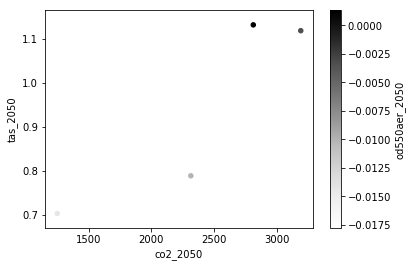

In [8]:
ax = df.query("model == 'MIROC-ES2L'").plot.scatter(x='co2_2050', y='tas_2050', c='od550aer_2050')

In [9]:
from utils import normalize
# Merge the year columns in to a long df 
df=pd.wide_to_long(df.reset_index(), ["tas", "od550aer", "co2", "ch4", "so2"], i=['model', 'scenario'], j="year", suffix='_(\d+)')
# Choose only the 2050 data since the aerosol signal is pretty non-existent by 2100
df = df[df.index.isin(["_2050"], level=2)]

In [10]:
df.describe()

,tas,od550aer,co2,ch4,so2
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1.085538,-0.006851,2415.708964,0.024789,-0.035145
std,0.381735,0.011775,613.880074,0.152382,0.025320
min,0.331449,-0.030857,1247.788346,-0.201275,-0.069425
25%,0.804487,-0.014140,1795.710867,-0.153999,-0.064020
50%,1.047218,-0.004727,2314.385253,-0.034673,-0.035997
75%,1.307697,0.003020,2813.146604,0.154481,-0.028185
max,2.028151,0.011563,3192.373467,0.205365,0.004142


In [11]:
# Do a 20/80 split of the data for test and training 
msk = np.random.rand(len(df)) < 0.8
train, test = df[msk], df[~msk]

## Try a few different models

R^2: 0.25
Proportion of 'Bad' estimates : 2.13%


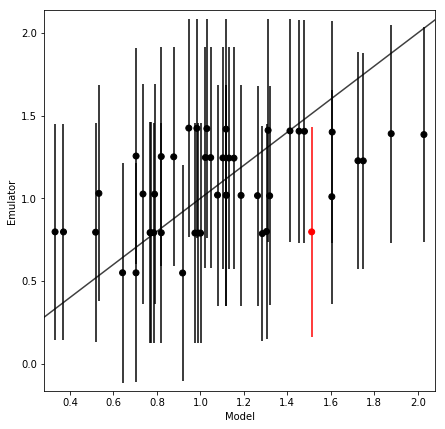

In [12]:
from esem.utils import leave_one_out, prediction_within_ci
from scipy import stats

# Try just modelling the temperature based on cumulative CO2
res = leave_one_out(df[['co2']], df[['tas']].values, model='GaussianProcess', kernel=['Linear'])

r2_values = stats.linregress(*np.squeeze(np.asarray(res, dtype=float)).T[0:2])[2]**2
print("R^2: {:.2f}".format(r2_values))
validation_plot(*np.squeeze(np.asarray(res, dtype=float)).T)

R^2: 0.40
Proportion of 'Bad' estimates : 8.51%


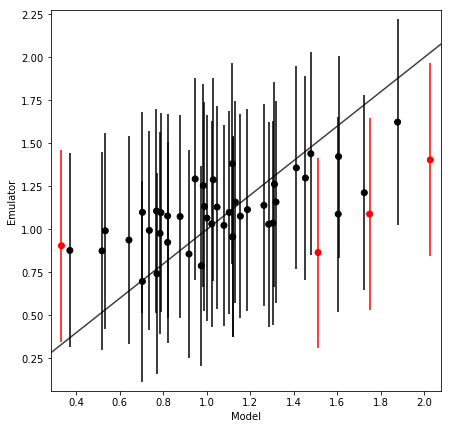

In [13]:
# This model still doesn't do brilliantly, but it's better than just CO2
res = leave_one_out(df[['co2', 'od550aer']], df[['tas']].values, model='GaussianProcess', kernel=['Linear'])

r2_values = stats.linregress(*np.squeeze(np.asarray(res, dtype=float)).T[0:2])[2]**2
print("R^2: {:.2f}".format(r2_values))
validation_plot(*np.squeeze(np.asarray(res, dtype=float)).T)

R^2: 0.40
Proportion of 'Bad' estimates : 8.51%


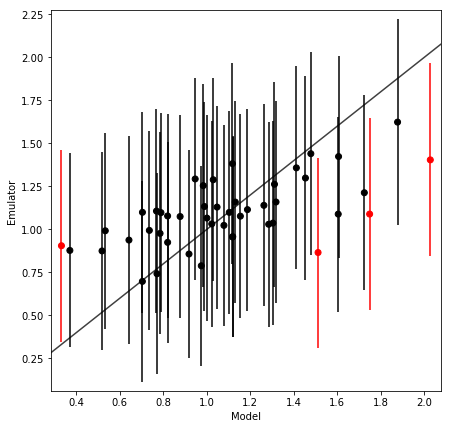

In [14]:
# Adding Methane doesn't seem to improve the picture
res = leave_one_out(df[['co2', 'od550aer', 'ch4']], df[['tas']].values, model='GaussianProcess', kernel=['Linear', 'Bias'])

r2_values = stats.linregress(*np.squeeze(np.asarray(res, dtype=float)).T[0:2])[2]**2
print("R^2: {:.2f}".format(r2_values))
validation_plot(*np.squeeze(np.asarray(res, dtype=float)).T)

## Plot the best

In [15]:
m = gp_model(df[['co2', 'od550aer']], df[['tas']].values, kernel=['Linear'])
m.train()

In [16]:
# Sample a large AOD/CO2 space using the emulator
xx, yy = np.meshgrid(np.linspace(0, 4000, 25), np.linspace(-.05, 0.05, 20))
X_new = np.stack([xx.flat, yy.flat], axis=1)
Y_new, Y_new_sigma = m.predict(X_new)

In [17]:
# Calculate the scnario mean values for comparison
scn_mean = train.groupby(['scenario']).mean()

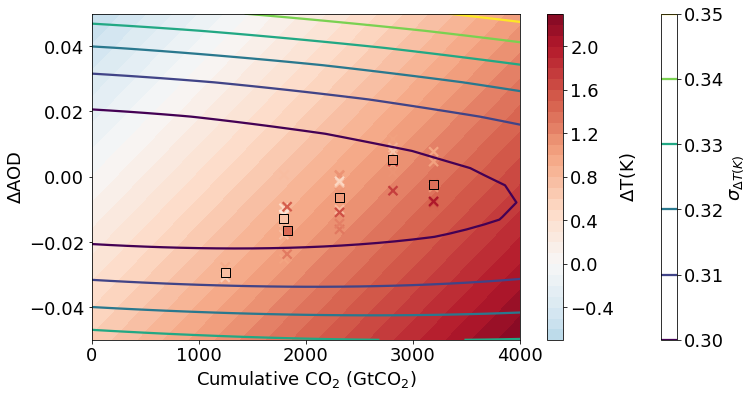

In [18]:
import matplotlib

scale = 1.5
matplotlib.rcParams['font.size'] = 12 * scale
matplotlib.rcParams['lines.linewidth'] = 1.5 * scale
matplotlib.rcParams['lines.markersize'] = 6 * scale

plt.figure(figsize=(12, 6))

norm = matplotlib.colors.Normalize(vmin=-2.5,vmax=2.5)
p = plt.contourf(xx, yy, Y_new.reshape(xx.shape), norm=norm, levels=30, cmap='RdBu_r')

plt.scatter(train.co2, train.od550aer, c=train.tas, norm=norm, edgecolors='k', cmap='RdBu_r', marker='x')
plt.scatter(scn_mean.co2, scn_mean.od550aer, c=scn_mean.tas, norm=norm, edgecolors='k', cmap='RdBu_r', marker='s')

c = plt.contour(xx, yy, np.sqrt(Y_new_sigma.reshape(xx.shape)), cmap='viridis', levels=6)

plt.setp(plt.gca(), xlabel='Cumulative CO$_2$ (GtCO$_2$)', ylabel='$\Delta$AOD')

plt.colorbar(c, label='$\sigma_{\Delta T(K)}$')
plt.colorbar(p, label='$\Delta$T(K)')

# Cumulative CO2, delta T and delta AOD all relative to a 2015-2020 average. Each point represents a single model integration for different scenarios in the CMIP6 archive. 
plt.savefig('CMIP6_emulator_paper_v1.1.png', transparent=True)


## Sample emissions for a particular temperature target

In [19]:
from esem.sampler import MCMCSampler

# The MCMC algorithm works much better with a normalised parameter range, so recreate the model
m = gp_model(pd.concat([df[['co2']]/4000, (df[['od550aer']]+0.05)/0.1], axis=1), df[['tas']].values, kernel=['Linear'])
m.train()

# Target 1.2 degrees above present day (roughly 2 degrees above pre-industrial)
sampler = MCMCSampler(m, np.asarray([1.2], dtype=np.float64))
samples = sampler.sample(n_samples=8000, mcmc_kwargs=dict(num_burnin_steps=1000) )

Acceptance rate: 0.9614173964786951


In [20]:
# Get the emulated temperatures for these samples
new_samples = pd.DataFrame(data=samples, columns=['co2', 'od550aer'])
Z, _ = m.predict(new_samples.values)

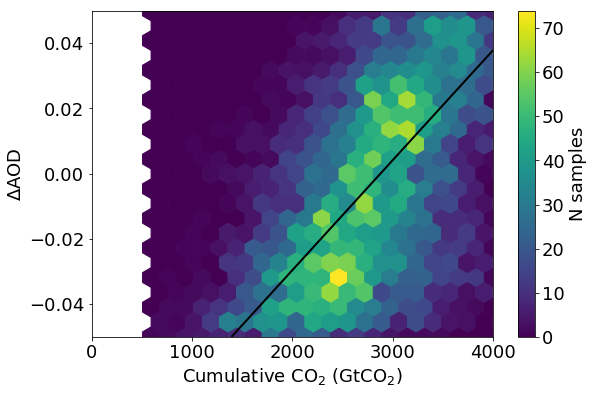

In [21]:
fig = plt.figure(figsize=(9, 6))

cl = plt.contour(xx, yy, Y_new.reshape(xx.shape), levels = [1.2],
             colors=('k',),linestyles=('-',),linewidths=(2,))

cl=plt.hexbin(new_samples.co2*4000, new_samples.od550aer*0.1-0.05, gridsize=20)

plt.setp(plt.gca(), xlabel='Cumulative CO$_2$ (GtCO$_2$)', ylabel='$\Delta$AOD')

plt.colorbar(cl, label='N samples')
plt.setp(plt.gca(), ylim=[-0.05, 0.05], xlim=[0, 4000])

plt.savefig('CMIP6_emulator_sampled.png', transparent=True)